In [1]:
#Import needed packages and inline plots
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

%matplotlib inline

In [2]:
#import and check on needed data files.
AdvWork = pd.read_csv('C:/Users/jcosta/Documents/Microsoft DS challenges/Machine_Learning/AdvWorksCusts.csv')
AdvWork.head(5)

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,4/8/1966,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,5/14/1965,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,8/12/1965,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,2/15/1968,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,8/8/1968,Bachelors,Professional,F,S,1,4,5,5,92771


In [3]:
AWM = pd.read_csv('C:/Users/jcosta/Documents/Microsoft DS challenges/Machine_Learning/AW_AveMonthSpend.csv')
AWM.head(5)

,CustomerID,AveMonthSpend
0,11000,89
1,11001,117
2,11002,123
3,11003,50
4,11004,95


In [4]:
AWB = pd.read_csv('C:/Users/jcosta/Documents/Microsoft DS challenges/Machine_Learning/AW_BikeBuyer.csv')
AWB.head(5)

,CustomerID,BikeBuyer
0,11000,0
1,11001,1
2,11002,0
3,11003,0
4,11004,1


In [5]:
Adv_Com = pd.read_csv('C:/Users/jcosta/Documents/Microsoft DS challenges/Machine_Learning/AdvWorksCusts_Combined.csv')
Adv_Com.head(5)

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,M,M,1,0,0,2,137947,89,0,31
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,M,S,0,1,3,3,101141,117,1,32
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,M,M,1,1,3,3,91945,123,0,32
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,F,S,0,1,0,0,86688,50,0,29
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,F,S,1,4,5,5,92771,95,1,29


In [6]:
#confirm look on data and do preporcessing
(Adv_Com.astype(np.object) == 'NaN').any()

CustomerID              False
Title                   False
FirstName               False
MiddleName              False
LastName                False
Suffix                  False
AddressLine1            False
AddressLine2            False
City                    False
StateProvinceName       False
CountryRegionName       False
PostalCode              False
PhoneNumber             False
BirthDate               False
Education               False
Occupation              False
Gender                  False
MaritalStatus           False
HomeOwnerFlag           False
NumberCarsOwned         False
NumberChildrenAtHome    False
TotalChildren           False
YearlyIncome            False
AveMonthSpend           False
BikeBuyer               False
Age                     False
dtype: bool

In [7]:
Adv_Com.drop('Title', axis=1, inplace=True)
Adv_Com.drop('Suffix', axis=1, inplace=True)

In [8]:
print(Adv_Com.shape)
print(Adv_Com.CustomerID.unique().shape)

(16519, 24)
(16404,)


In [9]:
# Begining of EDA 
Adv_Com.drop_duplicates(subset = 'CustomerID', keep = 'first', inplace = True)
print(Adv_Com.shape)
print(Adv_Com.CustomerID.unique().shape)

(16404, 24)
(16404,)


In [10]:
Adv_Com.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
count,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000
mean,20240.143136,0.674104,1.499756,0.991100,2.004511,78128.531517,72.389905,0.332297,35.446659
std,5340.370705,0.468723,1.139135,1.514278,1.682318,39726.533060,27.269568,0.471051,11.241737
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000,22.000000,0.000000,17.000000
25%,15617.750000,0.000000,1.000000,0.000000,0.000000,47811.750000,52.000000,0.000000,27.000000
50%,20231.500000,1.000000,2.000000,0.000000,2.000000,76125.000000,68.000000,0.000000,34.000000
75%,24862.250000,1.000000,2.000000,2.000000,3.000000,105200.250000,84.000000,1.000000,43.000000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000,176.000000,1.000000,87.000000


In [11]:
Adv_Com.median()

CustomerID              20231.5
HomeOwnerFlag               1.0
NumberCarsOwned             2.0
NumberChildrenAtHome        0.0
TotalChildren               2.0
YearlyIncome            76125.0
AveMonthSpend              68.0
BikeBuyer                   0.0
Age                        34.0
dtype: float64

(array([10953.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  5451.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

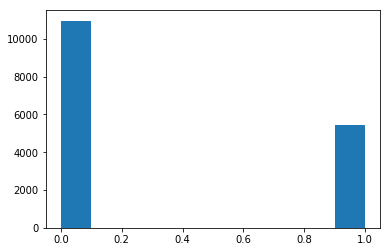

In [12]:
plt.hist(Adv_Com['BikeBuyer'])

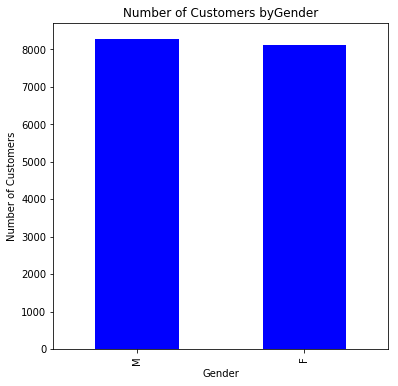

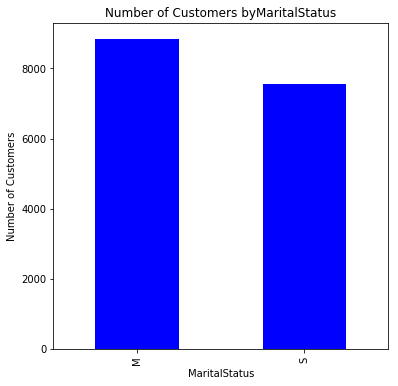

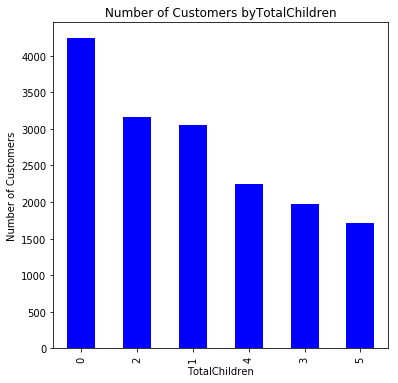

In [13]:
cols = Adv_Com.columns
def plot_bars(Adv_Com, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = Adv_Com[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Number of Customers by' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of Customers')# Set text for y axis
        plt.show()

plot_cols = ['Gender', 'MaritalStatus', 'TotalChildren']
plot_bars(Adv_Com, plot_cols)    

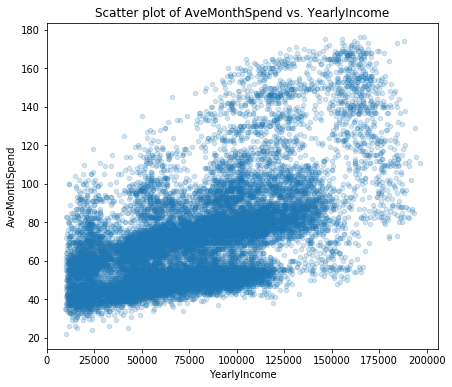

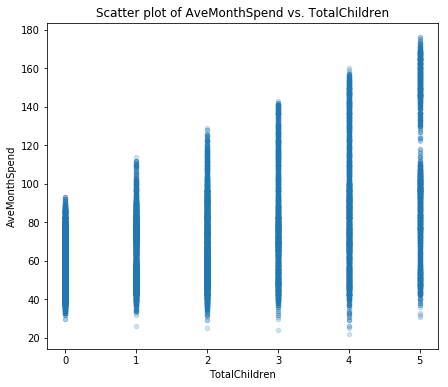

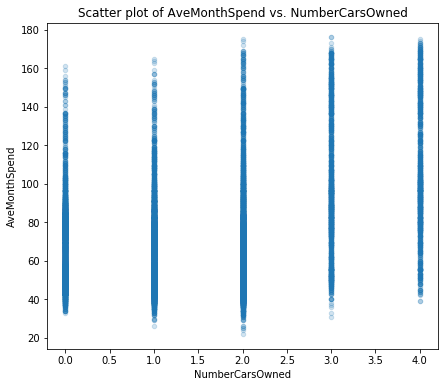

In [14]:
num_cols = ['YearlyIncome','TotalChildren','NumberCarsOwned',]
def plot_scatter_t(Adv_Com, cols, col_y = 'AveMonthSpend', alpha = 1.0):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        Adv_Com.plot.scatter(x = col, y = col_y, ax = ax, alpha = alpha)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y)# Set text for y axis
        plt.show()

plot_scatter_t(Adv_Com, num_cols, alpha = 0.2)   

In [15]:
Adv_Com.dtypes

CustomerID               int64
FirstName               object
MiddleName              object
LastName                object
AddressLine1            object
AddressLine2            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
AveMonthSpend            int64
BikeBuyer                int64
Age                      int64
dtype: object

In [16]:
Birthdate = pd.to_datetime(Adv_Com['BirthDate'])

In [17]:
Adv_Com['BirthDate'] = Birthdate

In [18]:
Adv_Com.dtypes

CustomerID                       int64
FirstName                       object
MiddleName                      object
LastName                        object
AddressLine1                    object
AddressLine2                    object
City                            object
StateProvinceName               object
CountryRegionName               object
PostalCode                      object
PhoneNumber                     object
BirthDate               datetime64[ns]
Education                       object
Occupation                      object
Gender                          object
MaritalStatus                   object
HomeOwnerFlag                    int64
NumberCarsOwned                  int64
NumberChildrenAtHome             int64
TotalChildren                    int64
YearlyIncome                     int64
AveMonthSpend                    int64
BikeBuyer                        int64
Age                              int64
dtype: object

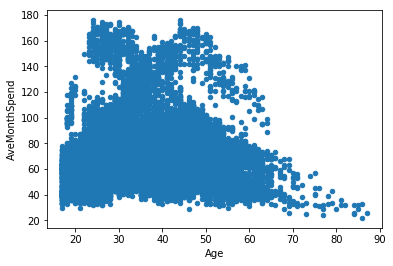

In [19]:
Adv_Com.plot.scatter(x = 'Age', y = 'AveMonthSpend',alpha = 1.0)

In [20]:
AW_test = pd.read_csv('C:/Users/jcosta/Documents/Microsoft DS challenges/Machine_Learning/AW_test.csv')
AW_test.head(5)

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,18988,NaN,Courtney,A,Baker,NaN,8727 Buena Vista Ave.,NaN,Fremont,California,...,1/5/1945,Bachelors,Management,F,S,0,2,0,5,86931
1,29135,NaN,Adam,C,Allen,NaN,3491 Cook Street,NaN,Haney,British Columbia,...,10/4/1964,Bachelors,Skilled Manual,M,M,1,2,2,4,100125
2,12156,NaN,Bonnie,NaN,Raji,NaN,359 Pleasant Hill Rd,NaN,Burbank,California,...,1/12/1934,Graduate Degree,Management,F,M,1,2,0,4,103985
3,13749,NaN,Julio,C,Alonso,NaN,8945 Euclid Ave.,NaN,Burlingame,California,...,9/22/1958,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161
4,27780,NaN,Christy,A,Andersen,NaN,"42, boulevard Tremblay",NaN,Dunkerque,Nord,...,3/19/1965,High School,Manual,F,M,1,1,2,2,21876


In [21]:
AW_test.drop('Title', axis=1, inplace=True)
AW_test.drop('Suffix', axis=1, inplace=True)

In [22]:
# Cleanup and begining of Classification building for ML analysis.
labels = np.array(Adv_Com['BikeBuyer'])

In [23]:
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

In [24]:
categorical_columns = ['Gender', 'Education', 'Occupation', 
                       'MaritalStatus','NumberCarsOwned','HomeOwnerFlag','NumberChildrenAtHome','TotalChildren']

Features = encode_string(Adv_Com['BikeBuyer'])
for col in categorical_columns:
    temp = encode_string(Adv_Com[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :])

(16404, 35)
[[1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1.
  0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [25]:
Features = np.concatenate([Features, np.array(Adv_Com[['YearlyIncome', 'Age']])], axis = 1)
print(Features.shape)
print(Features[:2, :]) 

(16404, 37)
[[1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 1.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.37947e+05
  3.10000e+01]
 [0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 1.01141e+05
  3.20000e+01]]


In [26]:
Adv_Com_ML = Adv_Com.drop('AveMonthSpend', axis=1, inplace=True)

In [27]:
## Randomly sample cases to create independent training and test data
nr.seed(9988)
labels = np.array(Adv_Com['BikeBuyer'])
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 40)
X_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [31]:
scaler = preprocessing.StandardScaler().fit(X_train[:,36:])
X_train[:,36:] = scaler.transform(X_train[:,36:])
X_test[:,36:] = scaler.transform(X_test[:,36:])
print(X_train.shape)
X_train[:5,:]

(16364, 37)


array([[ 0.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  8.86110000e+04,
        -5.73082841e-01],
       [ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00

In [32]:
logistic_mod = linear_model.LogisticRegression() 
logistic_mod.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
print(logistic_mod.intercept_)
print(logistic_mod.coef_)

[-0.25052085]
[[-2.14264399e+00  1.89212314e+00 -2.74515002e-01  2.39941540e-02
   3.40087194e-03 -1.09714875e-01 -5.49655338e-02 -2.51397710e-02
  -6.41015405e-02 -8.80401534e-02 -8.74716391e-02 -5.62110527e-02
   6.71631345e-02 -8.59611375e-02 -4.84258605e-01  2.33737757e-01
  -9.24425634e-02 -7.27905663e-02 -2.37854867e-01  8.69432614e-02
   6.56238868e-02 -1.06849911e-01 -1.43670937e-01 -6.60394430e-01
  -1.35736989e-01  1.36664891e-01  1.41586358e-01  1.24909694e-01
   1.42449628e-01 -2.14511538e-01 -1.27465416e-01 -1.18417007e-01
   1.44881954e-02  8.06501646e-02  1.14734752e-01  1.05352529e-05
  -4.33249094e-01]]


In [34]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15,:])

[[0.98744944 0.01255056]
 [0.33094523 0.66905477]
 [0.95257122 0.04742878]
 [0.89020299 0.10979701]
 [0.8747165  0.1252835 ]
 [0.90850106 0.09149894]
 [0.8978228  0.1021772 ]
 [0.97362348 0.02637652]
 [0.14845197 0.85154803]
 [0.97299608 0.02700392]
 [0.86815379 0.13184621]
 [0.93617906 0.06382094]
 [0.86094305 0.13905695]
 [0.30625005 0.69374995]
 [0.96013941 0.03986059]]


In [35]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores[:15]))
print(y_test[:15])

[0 1 0 0 0 0 0 0 1 0 0 0 0 1 0]
[0 1 0 0 0 0 0 0 1 0 0 0 0 1 0]


In [36]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores) 

                 Confusion matrix
                 Score positive    Score negative
Actual positive        28                 0
Actual negative         0                12

Accuracy  1.00
 
           Positive      Negative
Num case       28            12
Precision    1.00          1.00
Recall       1.00          1.00
F1           1.00          1.00


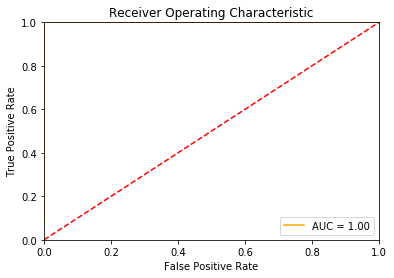

In [37]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities)

                 Confusion matrix
                 Score positive    Score negative
Actual positive        28                 0
Actual negative        12                 0

Accuracy  0.70
 
           Positive      Negative
Num case       28            12
Precision    0.70          0.00
Recall       1.00          0.00
F1           0.82          0.00


C:\Users\jcosta\AppData\Local\Anaconda_Install\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


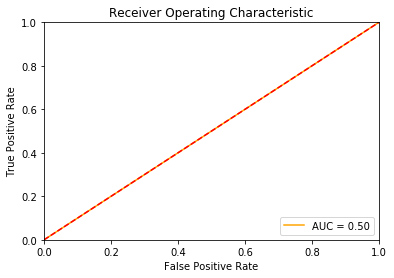

In [38]:
probs_positive = np.concatenate((np.ones((probabilities.shape[0], 1)), 
                                 np.zeros((probabilities.shape[0], 1))),
                                 axis = 1)
scores_positive = score_model(probs_positive, 0.5)
print_metrics(y_test, scores_positive)  
plot_auc(y_test, probs_positive) 

In [39]:
logistic_mod = linear_model.LogisticRegression(class_weight = {0:0.45, 1:0.55}) 
logistic_mod.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 0.45, 1: 0.55}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [40]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15,:])

[[0.99109726 0.00890274]
 [0.18292628 0.81707372]
 [0.96876094 0.03123906]
 [0.93598797 0.06401203]
 [0.91597842 0.08402158]
 [0.94488412 0.05511588]
 [0.93008482 0.06991518]
 [0.98232444 0.01767556]
 [0.07322205 0.92677795]
 [0.98289255 0.01710745]
 [0.91781604 0.08218396]
 [0.96209535 0.03790465]
 [0.9180877  0.0819123 ]
 [0.17403957 0.82596043]
 [0.97809333 0.02190667]]


                 Confusion matrix
                 Score positive    Score negative
Actual positive        28                 0
Actual negative         0                12

Accuracy  1.00
 
           Positive      Negative
Num case       28            12
Precision    1.00          1.00
Recall       1.00          1.00
F1           1.00          1.00


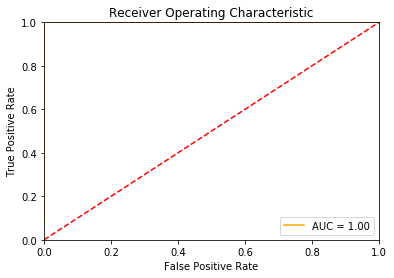

In [41]:
scores = score_model(probabilities, 0.5)
print_metrics(y_test, scores)  
plot_auc(y_test, probabilities)  

In [42]:
def test_threshold(probs, labels, threshold):
    scores = score_model(probs, threshold)
    print('')
    print('For threshold = ' + str(threshold))
    print_metrics(labels, scores)

thresholds = [0.45, 0.40, 0.35, 0.3, 0.25]
for t in thresholds:
    test_threshold(probabilities, y_test, t)


For threshold = 0.45
                 Confusion matrix
                 Score positive    Score negative
Actual positive        28                 0
Actual negative         0                12

Accuracy  1.00
 
           Positive      Negative
Num case       28            12
Precision    1.00          1.00
Recall       1.00          1.00
F1           1.00          1.00

For threshold = 0.4
                 Confusion matrix
                 Score positive    Score negative
Actual positive        28                 0
Actual negative         0                12

Accuracy  1.00
 
           Positive      Negative
Num case       28            12
Precision    1.00          1.00
Recall       1.00          1.00
F1           1.00          1.00

For threshold = 0.35
                 Confusion matrix
                 Score positive    Score negative
Actual positive        28                 0
Actual negative         0                12

Accuracy  1.00
 
           Positive      Negative
Num cas